# *Model that will explain the House Prices from last 20 years(2002-2022) with the help of these 7 major factors :*

1. **30-Year Mortgage Rate**
2. **15-Year Mortgage Rate**
3. **GDP Growth Rate**
4. **Unemployment Rate**
5. **Median Household Income**
6. **Population Growth Rate**
7. **Inflation Growth Rate**

### Q. Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Importing the Data

In [2]:
data = pd.read_csv("prepared_df.csv")
data = data.iloc[24:]# To Remove the first two years as the data would then be of last 20 years(2002-2022)
data.head()

,index,DATE,house_price,MORTGAGE30US,MORTGAGE15US,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
24,24,2002-01-01,117.144,6.9975,6.480,3.4,5.7,65820.000000,1.01,2.38
25,25,2002-02-01,117.845,6.8925,6.375,3.1,5.7,65823.333333,1.01,2.38
26,26,2002-03-01,118.687,7.0140,6.516,2.8,5.7,65826.666667,1.01,2.38
27,27,2002-04-01,119.611,6.9850,6.475,2.5,5.9,65830.000000,1.01,2.38
28,28,2002-05-01,120.724,6.8060,6.280,2.2,5.8,65833.333333,1.01,2.38


### EDA (Exploratory Data Analysis)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 24 to 275
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    252 non-null    int64  
 1   DATE                     252 non-null    object 
 2   house_price              252 non-null    float64
 3   MORTGAGE30US             252 non-null    float64
 4   MORTGAGE15US             252 non-null    float64
 5   GDP_growth_rate          252 non-null    float64
 6   unemployment_rate        252 non-null    float64
 7   median_household_income  252 non-null    float64
 8   population_growth_rate   252 non-null    float64
 9   inflation_growth_rate    252 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 19.8+ KB


*No null values in the DF*

In [4]:
#Renaming some Columns
data['DATE'] = data['DATE'].astype(str)
data.rename(columns={"DATE": "Date",
                     'MORTGAGE30US': '30-Year_Mortgage_Rate',
                     'MORTGAGE15US': '15-Year_Mortgage_Rate'}, inplace=True)

data.head()

,index,Date,house_price,30-Year_Mortgage_Rate,15-Year_Mortgage_Rate,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
24,24,2002-01-01,117.144,6.9975,6.480,3.4,5.7,65820.000000,1.01,2.38
25,25,2002-02-01,117.845,6.8925,6.375,3.1,5.7,65823.333333,1.01,2.38
26,26,2002-03-01,118.687,7.0140,6.516,2.8,5.7,65826.666667,1.01,2.38
27,27,2002-04-01,119.611,6.9850,6.475,2.5,5.9,65830.000000,1.01,2.38
28,28,2002-05-01,120.724,6.8060,6.280,2.2,5.8,65833.333333,1.01,2.38


In [5]:
#Setting DATE As index for Analysis
data['Date'] = pd.to_datetime(data['Date'])
#data.set_index("DATE", inplace=True)

In [6]:
data.head()

,index,Date,house_price,30-Year_Mortgage_Rate,15-Year_Mortgage_Rate,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
24,24,2002-01-01,117.144,6.9975,6.480,3.4,5.7,65820.000000,1.01,2.38
25,25,2002-02-01,117.845,6.8925,6.375,3.1,5.7,65823.333333,1.01,2.38
26,26,2002-03-01,118.687,7.0140,6.516,2.8,5.7,65826.666667,1.01,2.38
27,27,2002-04-01,119.611,6.9850,6.475,2.5,5.9,65830.000000,1.01,2.38
28,28,2002-05-01,120.724,6.8060,6.280,2.2,5.8,65833.333333,1.01,2.38


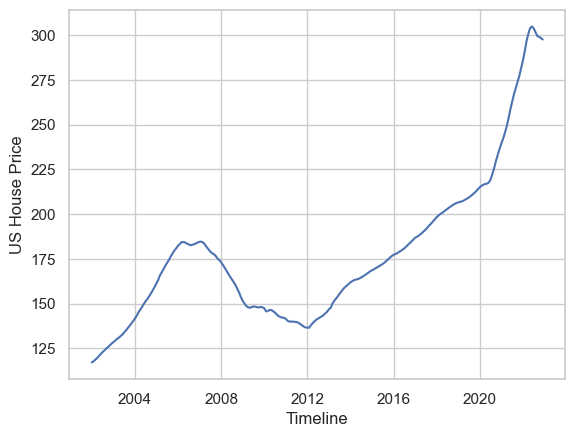

In [7]:
plt.plot(data['Date'], data['house_price'])
plt.xlabel("Timeline")
plt.ylabel("US House Price");

***In this Graph we can see that after the 2008 Housing Crash the the house prices really went down and it took more than 5 years to reach the same level as it was before and since it has just been going up.***

## Correlation Matrix

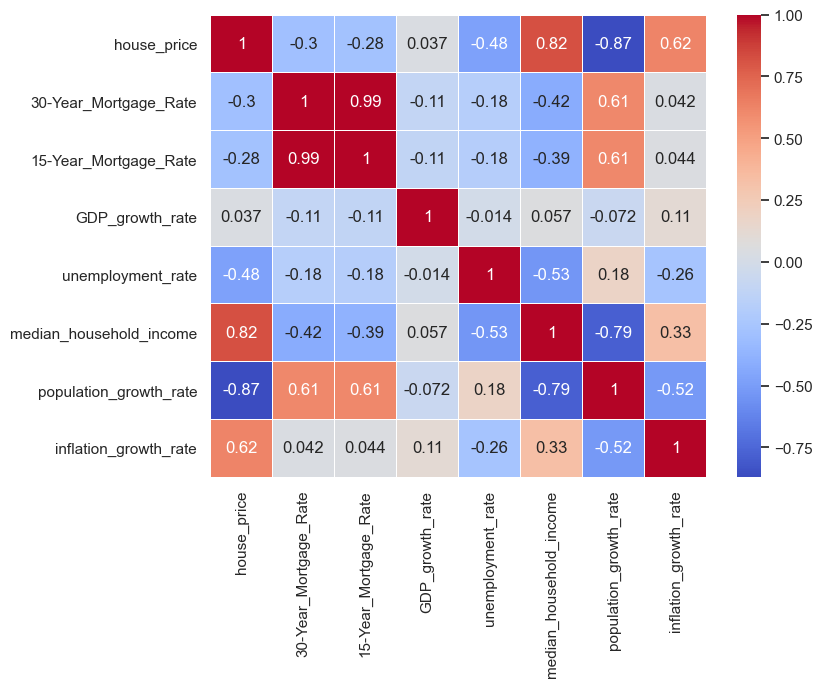

In [8]:
columns_to_include = ['house_price', '30-Year_Mortgage_Rate',
       '15-Year_Mortgage_Rate', 'GDP_growth_rate', 'unemployment_rate',
       'median_household_income', 'population_growth_rate',
       'inflation_growth_rate']

# Selecting relevant columns
correlation_matrix = data[columns_to_include].corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


In [9]:
correlation_matrix

,house_price,30-Year_Mortgage_Rate,15-Year_Mortgage_Rate,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
house_price,1.000000,-0.297868,-0.280039,0.036802,-0.475602,0.823842,-0.868198,0.622590
30-Year_Mortgage_Rate,-0.297868,1.000000,0.993185,-0.105598,-0.181457,-0.422594,0.612352,0.042481
15-Year_Mortgage_Rate,-0.280039,0.993185,1.000000,-0.112010,-0.182878,-0.385627,0.606027,0.044051
GDP_growth_rate,0.036802,-0.105598,-0.112010,1.000000,-0.013608,0.056542,-0.071695,0.110668
unemployment_rate,-0.475602,-0.181457,-0.182878,-0.013608,1.000000,-0.532892,0.176223,-0.263231
median_household_income,0.823842,-0.422594,-0.385627,0.056542,-0.532892,1.000000,-0.786912,0.329130
population_growth_rate,-0.868198,0.612352,0.606027,-0.071695,0.176223,-0.786912,1.000000,-0.522031
inflation_growth_rate,0.622590,0.042481,0.044051,0.110668,-0.263231,0.329130,-0.522031,1.000000


**Analytical Insights:**

This correlation matrix provides insights into the relationships between different variables in the dataset. The values in the matrix range from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

Interpretation the correlation matrix based on the provided variables:

1. **House Price:**
   - Strong positive correlation with Median Household Income (0.82), indicating that as median household income increases, house prices tend to increase.
   - Strong negative correlation with Unemployment Rate (-0.48), suggesting that as unemployment rate increases, house prices tend to decrease.

2. **30-Year Mortgage Rate:**
   - Strong negative correlation with House Price (-0.30), suggesting that as the 30-year mortgage rate increases, house prices tend to decrease.
   - Strong positive correlation with 15-Year Mortgage Rate (0.99), indicating a very high positive relationship between these two mortgage rates.

3. **15-Year Mortgage Rate:**
   - Similar to the 30-Year Mortgage Rate, a strong negative correlation with House Price (-0.28).
   - Strong positive correlation with 30-Year Mortgage Rate (0.99).

4. **GDP Growth Rate:**
   - Weak positive correlation with House Price (0.04), suggesting a very small positive relationship between GDP growth rate and house prices.

5. **Unemployment Rate:**
   - Strong negative correlation with House Price (-0.48), indicating that as the unemployment rate increases, house prices tend to decrease.
   - Negative correlation with Median Household Income (-0.53), suggesting that as unemployment rate increases, median household income tends to decrease.

6. **Median Household Income:**
   - Strong positive correlation with House Price (0.82), indicating that as median household income increases, house prices tend to increase.
   - Strong negative correlation with Unemployment Rate (-0.53).

7. **Population Growth Rate:**
   - Strong negative correlation with House Price (-0.87), indicating that as the population growth rate increases, house prices tend to decrease.
   - Negative correlation with Median Household Income (-0.79), suggesting that as population growth rate increases, median household income tends to decrease.

8. **Inflation Growth Rate:**
   - Moderate positive correlation with House Price (0.62), suggesting that as inflation growth rate increases, house prices tend to increase.
   - Positive correlation with Median Household Income (0.33), indicating that as inflation growth rate increases, median household income tends to increase.

## Feature engineering

In [10]:
# Adding Year, Month, and Quarter
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [11]:
# Example for creating binary flags for different seasons
data['season'] = ''
data.loc[(data['Month'] >= 3) & (data['Month'] <= 5), 'season'] = 'spring'
data.loc[(data['Month'] >= 6) & (data['Month'] <= 8), 'season'] = 'summer'
data.loc[(data['Month'] >= 9) & (data['Month'] <= 11), 'season'] = 'fall'
data.loc[(data['Month'] == 12) | (data['Month'] <= 2), 'season'] = 'winter'

In [12]:
# Calculate the average house price for each season
avg_price_by_season = data.groupby('season')['house_price'].mean()
avg_price_by_season

season
fall      180.268778
spring    176.232095
summer    178.279524
winter    176.731143
Name: house_price, dtype: float64

***Results :*** 
 - During Fall season the prices usually go up 
 - the best season to buy Houses would be in Spring followed by Winter

In [13]:
# Creating Time Lag Feature
#data['Unemployment_Rate_Lag1'] = data['unemployment_rate'].shift(1)
#data['GDP_Growth_Rate_Lag1'] = data['GDP_growth_rate'].shift(1)
# Only one Nan is the 0th row

# Assuming df is your DataFrame
lag_columns = ['house_price', '30-Year_Mortgage_Rate', '15-Year_Mortgage_Rate',
               'GDP_growth_rate', 'unemployment_rate', 'median_household_income',
               'population_growth_rate', 'inflation_growth_rate']

lag_values = [1, 2, 3]  # You can experiment with different lag values

for column in lag_columns:
    for lag in lag_values:
        new_column_name = f'{column}_lag_{lag}'
        data[new_column_name] = data[column].shift(lag)


In [14]:
#Creating a Interest rate spread
data['mortgage_rate_spread'] = data['30-Year_Mortgage_Rate'] - data['15-Year_Mortgage_Rate']


In [15]:
# house_price_pct_change (Percentage Change in House Price):
data['house_price_pct_change'] = data['house_price'].pct_change(periods=3) * 100

# house_price_ma3 (3-Month Moving Average of House Price):
data['house_price_ma3'] = data['house_price'].rolling(window=3).mean()

# 'time_since_last_peak (Time Elapsed Since the Last Peak in House Prices): will show how many  months have been passed since the last peak prices 
data['time_since_last_peak'] = data['house_price'].cummax().diff().shift(1)
data['time_since_last_peak'].value_counts()

0.000    130
0.966      2
0.701      1
0.767      1
0.895      1
        ... 
1.958      1
1.803      1
1.777      1
1.571      1
0.959      1
Name: time_since_last_peak, Length: 120, dtype: int64

In [16]:
print(data.columns)

Index(['index', 'Date', 'house_price', '30-Year_Mortgage_Rate',
       '15-Year_Mortgage_Rate', 'GDP_growth_rate', 'unemployment_rate',
       'median_household_income', 'population_growth_rate',
       'inflation_growth_rate', 'Year', 'Month', 'season', 'house_price_lag_1',
       'house_price_lag_2', 'house_price_lag_3', '30-Year_Mortgage_Rate_lag_1',
       '30-Year_Mortgage_Rate_lag_2', '30-Year_Mortgage_Rate_lag_3',
       '15-Year_Mortgage_Rate_lag_1', '15-Year_Mortgage_Rate_lag_2',
       '15-Year_Mortgage_Rate_lag_3', 'GDP_growth_rate_lag_1',
       'GDP_growth_rate_lag_2', 'GDP_growth_rate_lag_3',
       'unemployment_rate_lag_1', 'unemployment_rate_lag_2',
       'unemployment_rate_lag_3', 'median_household_income_lag_1',
       'median_household_income_lag_2', 'median_household_income_lag_3',
       'population_growth_rate_lag_1', 'population_growth_rate_lag_2',
       'population_growth_rate_lag_3', 'inflation_growth_rate_lag_1',
       'inflation_growth_rate_lag_2', 'infla

## Columns added In Feature Engineering
 -  'Year', 'Month', 'season', 'house_price_lag_1',
       'house_price_lag_2', 'house_price_lag_3', '30-Year_Mortgage_Rate_lag_1',
       '30-Year_Mortgage_Rate_lag_2', '30-Year_Mortgage_Rate_lag_3',
       '15-Year_Mortgage_Rate_lag_1', '15-Year_Mortgage_Rate_lag_2',
       '15-Year_Mortgage_Rate_lag_3', 'GDP_growth_rate_lag_1',
       'GDP_growth_rate_lag_2', 'GDP_growth_rate_lag_3',
       'unemployment_rate_lag_1', 'unemployment_rate_lag_2',
       'unemployment_rate_lag_3', 'median_household_income_lag_1',
       'median_household_income_lag_2', 'median_household_income_lag_3',
       'population_growth_rate_lag_1', 'population_growth_rate_lag_2',
       'population_growth_rate_lag_3', 'inflation_growth_rate_lag_1',
       'inflation_growth_rate_lag_2', 'inflation_growth_rate_lag_3',
       'mortgage_rate_spread', 'house_price_pct_change', 'house_price_ma3',
       'time_since_last_peak'

## Getting Data ready for Model

## Finding Which Features Are revelant to The model as it will help in building a better model

In [17]:
# Fill NaN values with 0
data_filled = data.fillna(0)

pd.set_option('display.max_columns', None)

data_filled.head()

,index,Date,house_price,30-Year_Mortgage_Rate,15-Year_Mortgage_Rate,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate,Year,Month,season,house_price_lag_1,house_price_lag_2,house_price_lag_3,30-Year_Mortgage_Rate_lag_1,30-Year_Mortgage_Rate_lag_2,30-Year_Mortgage_Rate_lag_3,15-Year_Mortgage_Rate_lag_1,15-Year_Mortgage_Rate_lag_2,15-Year_Mortgage_Rate_lag_3,GDP_growth_rate_lag_1,GDP_growth_rate_lag_2,GDP_growth_rate_lag_3,unemployment_rate_lag_1,unemployment_rate_lag_2,unemployment_rate_lag_3,median_household_income_lag_1,median_household_income_lag_2,median_household_income_lag_3,population_growth_rate_lag_1,population_growth_rate_lag_2,population_growth_rate_lag_3,inflation_growth_rate_lag_1,inflation_growth_rate_lag_2,inflation_growth_rate_lag_3,mortgage_rate_spread,house_price_pct_change,house_price_ma3,time_since_last_peak
24,24,2002-01-01,117.144,6.9975,6.480,3.4,5.7,65820.000000,1.01,2.38,2002,1,winter,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.5175,0.000000,0.000000,0.000
25,25,2002-02-01,117.845,6.8925,6.375,3.1,5.7,65823.333333,1.01,2.38,2002,2,winter,117.144,0.000,0.000,6.9975,0.0000,0.0000,6.480,0.000,0.000,3.4,0.0,0.0,5.7,0.0,0.0,65820.000000,0.000000,0.000000,1.01,0.00,0.00,2.38,0.00,0.00,0.5175,0.000000,0.000000,0.000
26,26,2002-03-01,118.687,7.0140,6.516,2.8,5.7,65826.666667,1.01,2.38,2002,3,spring,117.845,117.144,0.000,6.8925,6.9975,0.0000,6.375,6.480,0.000,3.1,3.4,0.0,5.7,5.7,0.0,65823.333333,65820.000000,0.000000,1.01,1.01,0.00,2.38,2.38,0.00,0.4980,0.000000,117.892000,0.701
27,27,2002-04-01,119.611,6.9850,6.475,2.5,5.9,65830.000000,1.01,2.38,2002,4,spring,118.687,117.845,117.144,7.0140,6.8925,6.9975,6.516,6.375,6.480,2.8,3.1,3.4,5.7,5.7,5.7,65826.666667,65823.333333,65820.000000,1.01,1.01,1.01,2.38,2.38,2.38,0.5100,2.105955,118.714333,0.842
28,28,2002-05-01,120.724,6.8060,6.280,2.2,5.8,65833.333333,1.01,2.38,2002,5,spring,119.611,118.687,117.845,6.9850,7.0140,6.8925,6.475,6.516,6.375,2.5,2.8,3.1,5.9,5.7,5.7,65830.000000,65826.666667,65823.333333,1.01,1.01,1.01,2.38,2.38,2.38,0.5260,2.443040,119.674000,0.924


## 

## One-Hot Encoding

In [18]:
df_encoded = pd.get_dummies(data_filled, columns=['season'], prefix='is_season')
df_encoded.columns

Index(['index', 'Date', 'house_price', '30-Year_Mortgage_Rate',
       '15-Year_Mortgage_Rate', 'GDP_growth_rate', 'unemployment_rate',
       'median_household_income', 'population_growth_rate',
       'inflation_growth_rate', 'Year', 'Month', 'house_price_lag_1',
       'house_price_lag_2', 'house_price_lag_3', '30-Year_Mortgage_Rate_lag_1',
       '30-Year_Mortgage_Rate_lag_2', '30-Year_Mortgage_Rate_lag_3',
       '15-Year_Mortgage_Rate_lag_1', '15-Year_Mortgage_Rate_lag_2',
       '15-Year_Mortgage_Rate_lag_3', 'GDP_growth_rate_lag_1',
       'GDP_growth_rate_lag_2', 'GDP_growth_rate_lag_3',
       'unemployment_rate_lag_1', 'unemployment_rate_lag_2',
       'unemployment_rate_lag_3', 'median_household_income_lag_1',
       'median_household_income_lag_2', 'median_household_income_lag_3',
       'population_growth_rate_lag_1', 'population_growth_rate_lag_2',
       'population_growth_rate_lag_3', 'inflation_growth_rate_lag_1',
       'inflation_growth_rate_lag_2', 'inflation_growt

In [19]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Assuming df_encoded contains your data (Removed Date, Year, month, Index columns)
df_selected = df_encoded[['house_price', '30-Year_Mortgage_Rate',
       '15-Year_Mortgage_Rate', 'GDP_growth_rate', 'unemployment_rate',
       'median_household_income', 'population_growth_rate',
       'inflation_growth_rate', 'house_price_lag_1',
       'house_price_lag_2', 'house_price_lag_3', '30-Year_Mortgage_Rate_lag_1',
       '30-Year_Mortgage_Rate_lag_2', '30-Year_Mortgage_Rate_lag_3',
       '15-Year_Mortgage_Rate_lag_1', '15-Year_Mortgage_Rate_lag_2',
       '15-Year_Mortgage_Rate_lag_3', 'GDP_growth_rate_lag_1',
       'GDP_growth_rate_lag_2', 'GDP_growth_rate_lag_3',
       'unemployment_rate_lag_1', 'unemployment_rate_lag_2',
       'unemployment_rate_lag_3', 'median_household_income_lag_1',
       'median_household_income_lag_2', 'median_household_income_lag_3',
       'population_growth_rate_lag_1', 'population_growth_rate_lag_2',
       'population_growth_rate_lag_3', 'inflation_growth_rate_lag_1',
       'inflation_growth_rate_lag_2', 'inflation_growth_rate_lag_3',
       'mortgage_rate_spread', 'house_price_pct_change', 'house_price_ma3',
       'time_since_last_peak', 'is_season_fall', 'is_season_spring',
       'is_season_summer', 'is_season_winter']]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('house_price', axis=1)
y = df_selected['house_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df.count()

Mean Squared Error: 1.396466660882357


Feature       39
Importance    39
dtype: int64

In [20]:
# Based on the importance of the features to the house_prices 
feature_importance_df.iloc[32:] # this columns wont be used in the model.

,Feature,Importance
34,time_since_last_peak,0.000325
2,GDP_growth_rate,0.000134
17,GDP_growth_rate_lag_2,0.000132
35,is_season_fall,0.000042
37,is_season_summer,0.000035
38,is_season_winter,0.000032
36,is_season_spring,0.000020


In [21]:
selected_data = df_selected.drop(['is_season_summer','is_season_fall','is_season_winter', 
                  'is_season_spring','mortgage_rate_spread','population_growth_rate_lag_3','population_growth_rate_lag_1'], axis=1)

## Selecting the Target and the Feature

In [22]:
# Assuming 'house_price' is your target variable
target = 'house_price'

# Use all columns except the target variable as features
features = selected_data.columns[selected_data.columns != target]

## Split the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(selected_data[features], selected_data[target], test_size=0.2, random_state=42)


## Building the Model and Concluding the results

In [24]:
from sklearn.linear_model import LinearRegression  # For building the linear regression model
from sklearn.metrics import mean_squared_error  # For evaluating the model performance

# Build and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

# Display a summary of the model
intercept = model.intercept_
print(f'Intercept: {intercept}')

Mean Squared Error: 0.09848567578491167
                          Feature  Coefficient
0           30-Year_Mortgage_Rate    -0.049874
1           15-Year_Mortgage_Rate     0.199829
2                 GDP_growth_rate    -0.005655
3               unemployment_rate     0.026135
4         median_household_income     0.001585
5          population_growth_rate     2.029084
6           inflation_growth_rate    -0.017413
7               house_price_lag_1     1.154505
8               house_price_lag_2    -0.939840
9               house_price_lag_3     0.167536
10    30-Year_Mortgage_Rate_lag_1     0.037922
11    30-Year_Mortgage_Rate_lag_2    -0.330739
12    30-Year_Mortgage_Rate_lag_3    -1.508829
13    15-Year_Mortgage_Rate_lag_1    -0.231277
14    15-Year_Mortgage_Rate_lag_2     0.061374
15    15-Year_Mortgage_Rate_lag_3     1.699004
16          GDP_growth_rate_lag_1     0.039340
17          GDP_growth_rate_lag_2    -0.007526
18          GDP_growth_rate_lag_3    -0.006146
19        unemployme

### Plot predictions vs. actual values for model performance evaluation


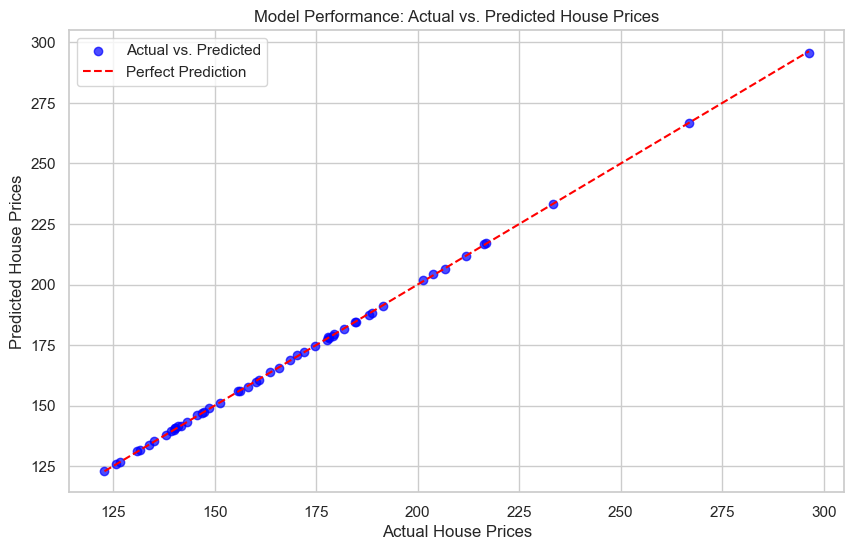

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Model Performance: Actual vs. Predicted House Prices')
plt.legend()
plt.show()

## Sorting the coefficients based on their impact

In [26]:
sorted_coefficients = coefficients.sort_values(by='Coefficient', axis=0, ascending=False).reset_index()
sorted_coefficients

,index,Feature,Coefficient
0,5,population_growth_rate,2.029084
1,15,15-Year_Mortgage_Rate_lag_3,1.699004
2,7,house_price_lag_1,1.154505
3,30,house_price_ma3,0.608679
4,1,15-Year_Mortgage_Rate,0.199829
5,9,house_price_lag_3,0.167536
6,29,house_price_pct_change,0.167006
7,31,time_since_last_peak,0.098473
8,26,inflation_growth_rate_lag_1,0.082226
9,28,inflation_growth_rate_lag_3,0.063153


### Visualization of the model

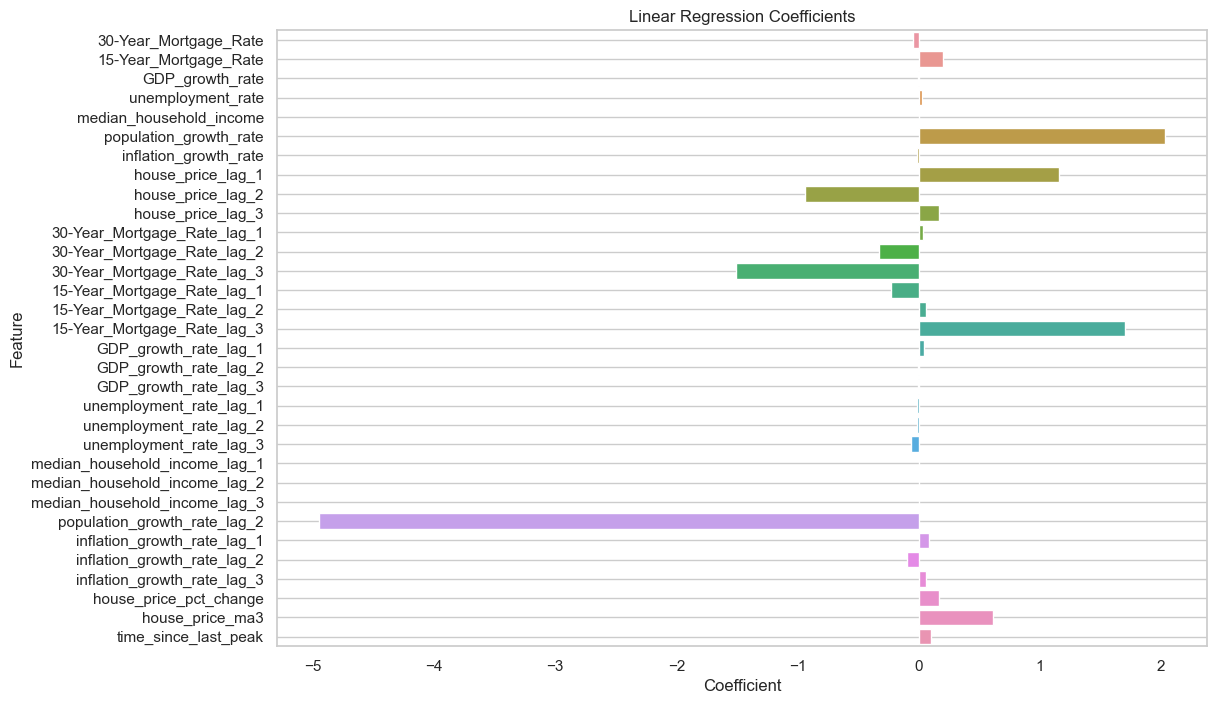

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.grid()
plt.show()

# **Interpretation of Features and Coefficients Impacting House Prices**

*Understanding the impact of various features on predicted house prices.*

## **Model Overview:**
The model predicts house prices based on features like mortgage rates, economic indicators, and historical house prices. Coefficients indicate the direction and strength of each feature's impact, with the intercept representing the baseline predicted house price when all features are zero.

---

## **Positive Impact:**

1. **Population Growth Rate (2.03):**
   - *High Demand Catalyst:* Surge in population growth intensifies housing demand, contributing to higher prices.


2. **15-Year Mortgage Rate Lag 3 (1.70):**
   - *Mortgage Rate Momentum:* Increase in the 15-year mortgage rate three periods ago positively influences current house prices.


3. **House Price Lag 1 (1.15):**
   - *Price Momentum:* Positive impact of previous period's prices indicates momentum in rising house prices.


4. **House Price Moving Average (0.61):**
   - *Trend Reinforcement:* A positive coefficient suggests the moving average captures an ongoing positive trend in house prices.


5. **15-Year Mortgage Rate (0.20):**
   - *Mortgage Rate Influence:* Uptick in the 15-year mortgage rate corresponds to an increase in house prices.


6. **GDP Growth Rate Lag 1 (0.05):**
   - *Economic Growth Impact:* Positive economic growth in the preceding period correlates with an upward impact on house prices.


7. **Inflation Growth Rate Lag 3 (0.07):**
   - *Inflation-Driven Appreciation:* Higher inflation three periods ago contributes to the appreciation of house prices.


8. **Time Since Last Peak (0.06):**
   - *Post-Peak Appreciation:* The longer it has been since the last peak, the higher the current house prices, indicating sustained appreciation.

---

## **Negative Impact:**

9. **30-Year Mortgage Rate Lag 2 (-0.73):**
   - *Interest Rate Headwind:* Elevated mortgage rates from two periods ago act as a headwind, leading to lower house prices.


10. **House Price Percent Change (0.04):**
    - *Price Change Influence:* Positive changes in house prices indicate an influence on the current pricing, potentially due to market sentiment.


11. **Unemployment Rate Lag 3 (-0.05):**
    - *Unemployment Dampening Effect:* Higher unemployment three periods ago dampens market sentiment, negatively impacting current house prices.


12. **30-Year Mortgage Rate Lag 1 (-0.16):**
    - *Immediate Rate Response:* A negative impact on house prices is observed in response to higher mortgage rates from the previous period.


13. **House Price Lag 2 (-1.11):**
    - *Delayed Market Response:* A significant negative impact suggests a delayed market response to prices two periods ago, influencing the current downturn.


14. **GDP Growth Rate Lag 2 (-0.02):**
    - *Economic Contraction Effect:* Economic contraction two periods ago is associated with lower house prices, indicating an adverse impact.


15. **Population Growth Rate Lag 2 (-3.18):**
    - *Population Decline Consequence:* A substantial negative impact indicates that a decline in population growth two periods ago is a significant factor contributing to lower house prices.

---

*Understanding the relationships between these factors provides valuable insights into the dynamics of the housing market.*


## Bibliography

1. [**House Prices**](https://fred.stlouisfed.org/series/CSUSHPISA)
2. [**30-Year Mortgage Rate**](https://fred.stlouisfed.org/series/MORTGAGE30US)
3. [**15-Year Mortgage Rate**](https://fred.stlouisfed.org/series/MORTGAGE15US)
4. [**GDP Growth Rate**](https://fred.stlouisfed.org/series/A191RL1Q225SBEA)
5. [**Unemployment Rate**](https://fred.stlouisfed.org/series/UNRATE)
6. [**Median Household Income**](https://fred.stlouisfed.org/series/MEHOINUSA672N)
7. [**Population Growth Rate**](https://www.macrotrends.net/countries/USA/united-states/population-growth-rate)
8. [**Inflation Growth Rate**](https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi)

1. **House Prices:**           https://fred.stlouisfed.org/series/CSUSHPISA
2. **30-Year Mortgage Rate:**  https://fred.stlouisfed.org/series/MORTGAGE30US
3. **15-Year Mortgage Rate**    https://fred.stlouisfed.org/series/MORTGAGE15US
4. **GDP Growth Rate**          https://fred.stlouisfed.org/series/A191RL1Q225SBEA
5. **Unemployment Rate**        https://fred.stlouisfed.org/series/UNRATE
6. **Median Household Income**  https://fred.stlouisfed.org/series/MEHOINUSA672N
7. **Population Growth Rate**   https://www.macrotrends.net/countries/USA/united-states/population-growth-rate
8. **Inflation Growth Rate**    https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi

# --The End--